### Machine Learning 
+ Supervised ML with Iris Dataset

In [47]:
# EDA packages
import pandas as pd
import numpy as np

In [48]:
# Plotting Packages
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# ML Packages

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression



#### EDA Descriptive

In [50]:
# load our dataset
df = pd.read_csv("Fish.csv")

In [51]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [52]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [53]:
# Check for missing values
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [54]:
df.shape

(159, 7)

In [55]:
# Species distribution
print(df.groupby('Species').size())

Species
Bream        35
Parkki       11
Perch        56
Pike         17
Roach        20
Smelt        14
Whitefish     6
dtype: int64


### Data Visualization
+ Understand each attribute
+ Understand relationship between each

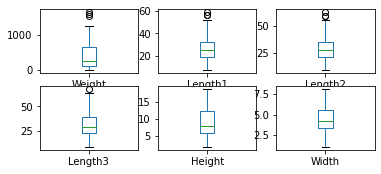

In [56]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

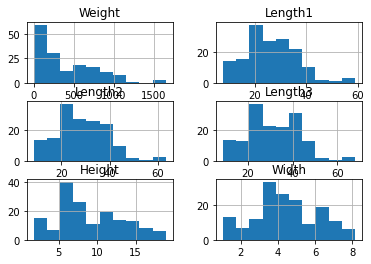

In [57]:
# histograms using pandas plot
df.hist()
plt.show()

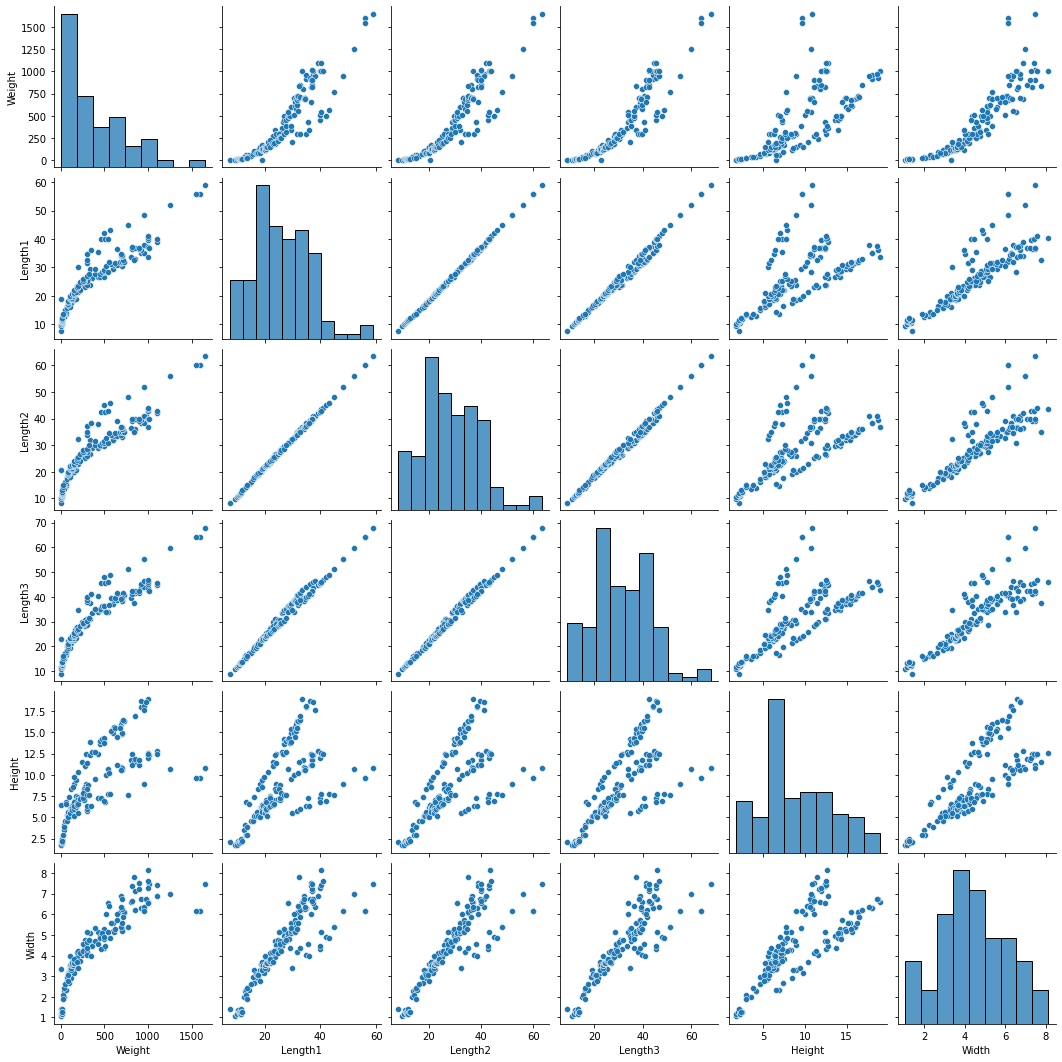

In [58]:
# Multivariate Plots
# Relationships between each attribute
sns.pairplot(df)

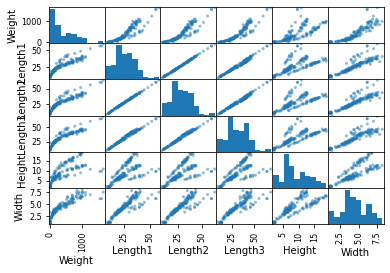

In [59]:
# scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

In [60]:
### ML 

In [61]:
# Split-out validation dataset
X = df.drop('Species',axis=1).to_numpy()
Y = df['Species'].to_numpy()


### Train Test Split

In [62]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [63]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

In [64]:
logit.fit(X_train,Y_train)

C:\Users\shahy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
print("accuracy :" , logit.score(X_validation,Y_validation))

accuracy : 0.84375


In [66]:
logit.predict(X_validation)

array(['Perch', 'Pike', 'Smelt', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Roach', 'Roach', 'Bream', 'Perch', 'Bream', 'Smelt',
       'Perch', 'Roach', 'Roach', 'Bream', 'Smelt', 'Bream', 'Pike',
       'Perch', 'Roach', 'Bream', 'Perch', 'Perch', 'Perch', 'Perch',
       'Roach', 'Perch', 'Perch', 'Pike'], dtype=object)

In [67]:
# Individual Prediction
mysample = np.array([242,23.2,25.4,30,11.52,4.02])
ex1 = mysample.reshape(1,-1)
#Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [68]:
logit.predict(ex1)

array(['Bream'], dtype=object)

### Saving or Persisting Our Model
+ Pickle 
+ Joblib

In [69]:
# Save Model Using Pickle
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle

In [70]:
import sklearn.externals
import joblib
joblib.dump(logit, 'logit_model_fish.pkl') 

['logit_model_fish.pkl']

In [72]:
# Reloading the Model
logit_model = joblib.load('logit_model_fish.pkl')

In [73]:
df.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [74]:
ex2 = np.array([170,19,20.7,23.2,9.396,3.4104]).reshape(1,-1)


In [75]:
logit_model.predict(ex2)

array(['Bream'], dtype=object)

In [76]:
### Get the Models for the other ML Algorithms

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [78]:
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()
svm = SVC() 

In [79]:
# Fit the model
knn.fit(X_train, Y_train)
print("accuracy :" , knn.score(X_validation,Y_validation))

accuracy : 0.53125


In [81]:
# save the model to disk
joblib.dump(knn, 'knn_model_fish.pkl') 

['knn_model_fish.pkl']

In [82]:
dtree.fit(X_train, Y_train)
print("accuracy :" , dtree.score(X_validation,Y_validation))

accuracy : 0.625


In [83]:
# save the model to disk
joblib.dump(dtree, 'dtree_model_fish.pkl') 

['dtree_model_fish.pkl']

In [84]:
svm.fit(X_train, Y_train)
print("accuracy :" , svm.score(X_validation,Y_validation))

accuracy : 0.5


In [85]:
# save the model to disk
joblib.dump(svm, 'svm_model_fish.pkl') 

['svm_model_fish.pkl']